<h1 align="center"><strong>Predicción del estado de cobro del Bono Independiente en la emergencia del COVID19</strong></h1>



---


 - Dataset original:  [Bono Independiente](https://www.datosabiertos.gob.pe/dataset/bono-independiente-ministerio-de-trabajo-y-promocion-del-empleo-mtpe)  [Ministerio de Trabajo y Promocion del Empleo - MTPE].
 - Autor: [Renzo Alexis Guerrero Huayta](https://github.com/renzoguerrero17)






# **Conectando Colab con Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/Electivos/IAA/Evaluaciones/PC2/Clasificacion")

# **1.Análisis exploratorio de datos**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!ls

BonoIndependiente-COVID19.ipynb  bono_Independiente_trabajaperu.csv


In [ ]:
df = pd.read_csv("bono_Independiente_trabajaperu.csv", sep = ",", engine='python')

In [ ]:
# Visualizacion global de los datos
df.head()

,COD_HOGAR,UBIGEO,DE_DEPARTAMENTO,DE_PROVINCIA,DE_DISTRITO,PERSONAS_HOGAR,MONTO,TIPO_BONO,BONO_COBRADO,FECHA_COBRO,ENTIDAD_COBRO,MEDIO_COBRO,FECHA_ACTUALIZACION
0,43,10205,AMAZONAS,BAGUA,IMAZA,2,760.0,BONO_INDEPENDIENTE,SI,2020-04-27T00:00:00Z,BANCO DE LA NACION,ABONO EN CUENTA,2020-06-20T00:00:00Z
1,76,10310,AMAZONAS,BONGARA,SHIPASBAMBA,1,760.0,BONO_INDEPENDIENTE,SI,2020-04-27T00:00:00Z,BANCO DE LA NACION,ABONO EN CUENTA,2020-06-20T00:00:00Z
2,166,60801,CAJAMARCA,JAEN,JAEN,1,760.0,BONO_INDEPENDIENTE,SI,2020-04-27T00:00:00Z,BANCO DE LA NACION,ABONO EN CUENTA,2020-06-20T00:00:00Z
3,174,10502,AMAZONAS,LUYA,CAMPORREDONDO,2,760.0,BONO_INDEPENDIENTE,SI,2020-04-29T00:00:00Z,BANCO DE LA NACION,BANCA CELULAR,2020-06-20T00:00:00Z
4,337,20301,ANCASH,ANTONIO RAYMONDI,LLAMELLIN,1,760.0,BONO_INDEPENDIENTE,NO,NaN,BANCO DE LA NACION,VENTANILLA,2020-06-20T00:00:00Z


In [ ]:
# Informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773291 entries, 0 to 773290
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   COD_HOGAR            773291 non-null  int64  
 1   UBIGEO               773291 non-null  int64  
 2   DE_DEPARTAMENTO      773291 non-null  object 
 3   DE_PROVINCIA         773291 non-null  object 
 4   DE_DISTRITO          773291 non-null  object 
 5   PERSONAS_HOGAR       773291 non-null  int64  
 6   MONTO                773291 non-null  float64
 7   TIPO_BONO            773291 non-null  object 
 8   BONO_COBRADO         773291 non-null  object 
 9   FECHA_COBRO          679584 non-null  object 
 10  ENTIDAD_COBRO        773291 non-null  object 
 11  MEDIO_COBRO          773291 non-null  object 
 12  FECHA_ACTUALIZACION  773291 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 76.7+ MB


In [ ]:
# Dimension original del dataset
df.shape

(773291, 13)

In [ ]:
# Vemos si hay valores nulos o no
df.isnull().sum()

COD_HOGAR                  0
UBIGEO                     0
DE_DEPARTAMENTO            0
DE_PROVINCIA               0
DE_DISTRITO                0
PERSONAS_HOGAR             0
MONTO                      0
TIPO_BONO                  0
BONO_COBRADO               0
FECHA_COBRO            93707
ENTIDAD_COBRO              0
MEDIO_COBRO                0
FECHA_ACTUALIZACION        0
dtype: int64

In [ ]:
# Analizamos la variable departamento
ocurrencias_dpto = df['DE_DEPARTAMENTO'].value_counts()
print(ocurrencias_dpto)
print("Número de departamentos: ", ocurrencias_dpto.shape[0])

LIMA             240742
AREQUIPA          80790
LA LIBERTAD       49387
JUNIN             40545
PIURA             34534
PUNO              34135
LAMBAYEQUE        33072
ANCASH            28198
CUSCO             24323
ICA               24305
SAN MARTIN        23793
CAJAMARCA         22930
CALLAO            22343
HUANUCO           18878
TACNA             15986
AYACUCHO          14880
LORETO            12871
UCAYALI            9471
MADRE DE DIOS      7737
PASCO              7695
MOQUEGUA           6537
TUMBES             5885
AMAZONAS           5635
APURIMAC           5167
HUANCAVELICA       3452
Name: DE_DEPARTAMENTO, dtype: int64
Número de departamentos:  25


In [ ]:
# Vemos en % 
porcen_departamentos = ocurrencias_dpto/df.DE_DEPARTAMENTO.shape[0]
print(porcen_departamentos)

LIMA             0.311321
AREQUIPA         0.104476
LA LIBERTAD      0.063866
JUNIN            0.052432
PIURA            0.044658
PUNO             0.044143
LAMBAYEQUE       0.042768
ANCASH           0.036465
CUSCO            0.031454
ICA              0.031431
SAN MARTIN       0.030768
CAJAMARCA        0.029652
CALLAO           0.028893
HUANUCO          0.024413
TACNA            0.020673
AYACUCHO         0.019242
LORETO           0.016644
UCAYALI          0.012248
MADRE DE DIOS    0.010005
PASCO            0.009951
MOQUEGUA         0.008453
TUMBES           0.007610
AMAZONAS         0.007287
APURIMAC         0.006682
HUANCAVELICA     0.004464
Name: DE_DEPARTAMENTO, dtype: float64


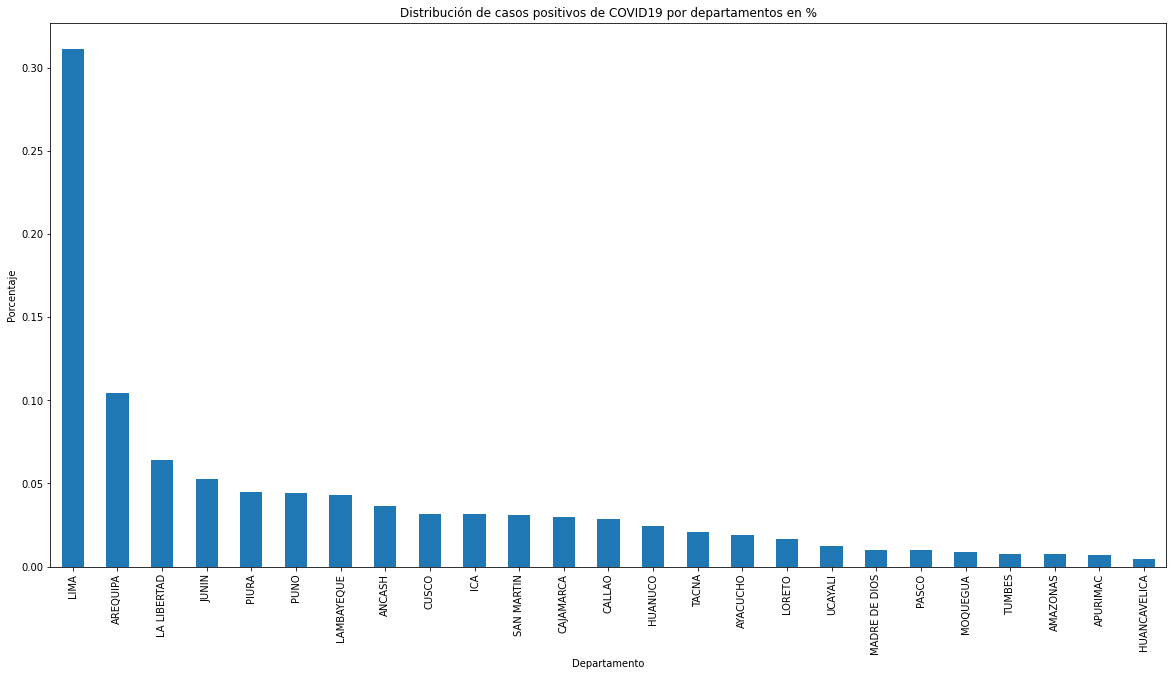

In [ ]:
plt.figure(figsize=(20,10))
porcen_departamentos.plot(kind = 'bar', rot=0)
plt.xticks(range(len(porcen_departamentos)), list(porcen_departamentos.index.values),rotation=90)
plt.title("Distribución de casos positivos de COVID19 por departamentos en %")
plt.xlabel("Departamento")
plt.ylabel("Porcentaje")
plt.show()

In [ ]:
# Analizamos la variable provincia
ocurrencias_prov = df['DE_PROVINCIA'].value_counts()
print(ocurrencias_prov)
print("Numero de provincias: ", ocurrencias_prov.shape[0])

LIMA                         212589
AREQUIPA                      69774
TRUJILLO                      34339
CHICLAYO                      27241
HUANCAYO                      22919
                              ...  
ASUNCION                         42
CONDORCANQUI                     30
CARLOS FERMIN FITZCARRALD        27
MARISCAL LUZURIAGA               19
PURUS                            11
Name: DE_PROVINCIA, Length: 196, dtype: int64
Numero de provincias:  196


In [ ]:
# Vemos en % 
porcen_provincias = df['DE_PROVINCIA'].value_counts()/df.DE_PROVINCIA.shape[0]
print(porcen_provincias)

LIMA                         0.274915
AREQUIPA                     0.090230
TRUJILLO                     0.044406
CHICLAYO                     0.035227
HUANCAYO                     0.029638
                               ...   
ASUNCION                     0.000054
CONDORCANQUI                 0.000039
CARLOS FERMIN FITZCARRALD    0.000035
MARISCAL LUZURIAGA           0.000025
PURUS                        0.000014
Name: DE_PROVINCIA, Length: 196, dtype: float64


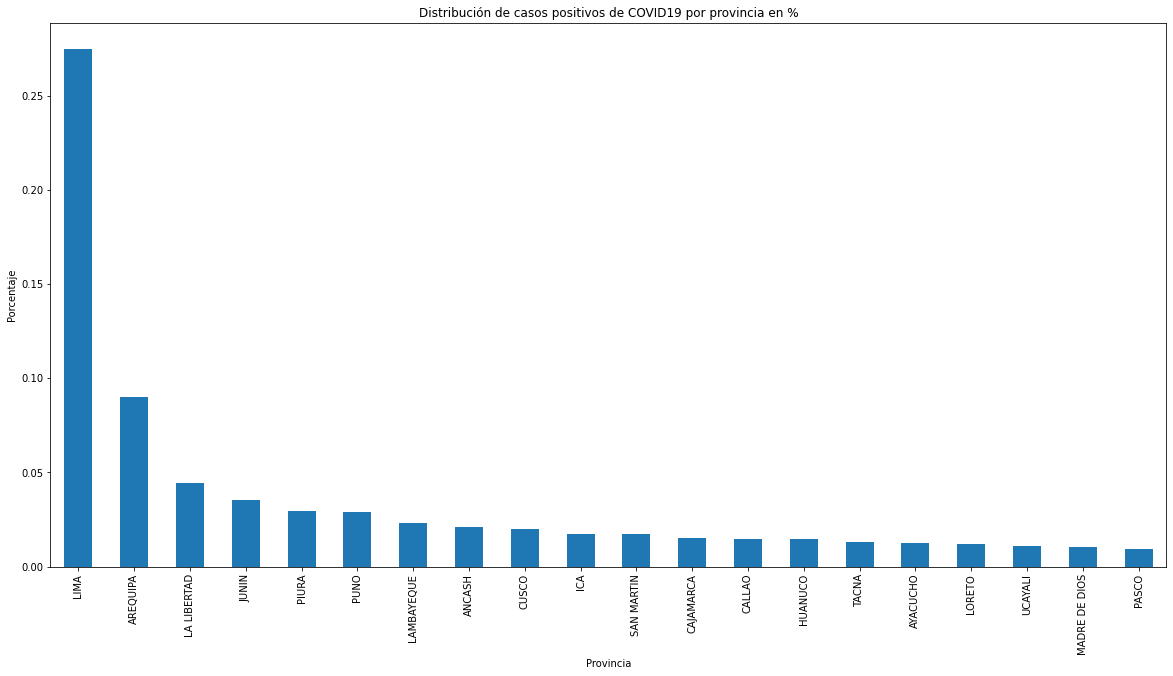

In [ ]:
plt.figure(figsize=(20,10))
porcen_provincias[0:20].plot(kind = 'bar', rot=0)
plt.xticks(range(len(porcen_departamentos[0:20])), list(porcen_departamentos.index.values[0:20]),rotation=90)
plt.title("Distribución de casos positivos de COVID19 por provincia en %")
plt.xlabel("Provincia")
plt.ylabel("Porcentaje")
plt.show()

In [ ]:
# Variable distrito
porcen_distritos = df['DE_DISTRITO'].value_counts()/df.DE_DISTRITO.shape[0]
print(porcen_distritos)

SAN JUAN DE LURIGANCHO    0.028423
SAN MARTIN DE PORRES      0.021961
JULIACA                   0.019123
COMAS                     0.017550
TRUJILLO                  0.015664
                            ...   
LINCHA                    0.000001
CAICAY                    0.000001
MUSGA                     0.000001
SAN JUAN DE IRIS          0.000001
SAYLA                     0.000001
Name: DE_DISTRITO, Length: 1632, dtype: float64


In [ ]:
df["PERSONAS_HOGAR"].value_counts()

1     379610
2     253676
3      94011
4      33984
5       9044
6       2251
7        528
8        133
9         37
10        15
13         1
12         1
Name: PERSONAS_HOGAR, dtype: int64

In [ ]:
porcen_num_perso = df['PERSONAS_HOGAR'].value_counts()/df['PERSONAS_HOGAR'].shape[0]
print(porcen_num_perso)

1     0.490902
2     0.328047
3     0.121573
4     0.043947
5     0.011695
6     0.002911
7     0.000683
8     0.000172
9     0.000048
10    0.000019
13    0.000001
12    0.000001
Name: PERSONAS_HOGAR, dtype: float64


In [ ]:
porcen_num_perso.values[0]

0.49090187264561463

In [ ]:
# Acumulado
sum = 0
acumulado_npers = {}
for i in range(len(porcen_num_perso)):
  aporte = porcen_num_perso.values[i]
  dep = porcen_num_perso.index[i]
  sum = sum + aporte
  acumulado_npers.setdefault(dep,sum)
acumulado_npers = pd.Series(acumulado_npers)
print(acumulado_npers)

1     0.490902
2     0.818949
3     0.940522
4     0.984469
5     0.996164
6     0.999075
7     0.999758
8     0.999930
9     0.999978
10    0.999997
13    0.999999
12    1.000000
dtype: float64


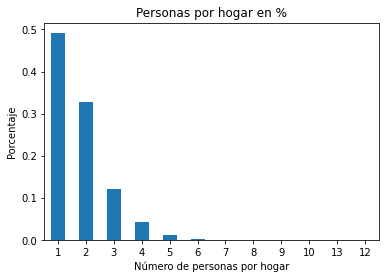

In [ ]:
porcen_num_perso.plot(kind = 'bar', rot=0)
plt.xticks(range(len(list(porcen_num_perso.index))), list(porcen_num_perso.index))
plt.title("Personas por hogar en %")
plt.xlabel("Número de personas por hogar")
plt.ylabel("Porcentaje")
plt.show()

In [ ]:
df["MONTO"].value_counts()

760.0    773291
Name: MONTO, dtype: int64

In [ ]:
df["TIPO_BONO"].value_counts()

BONO_INDEPENDIENTE    773291
Name: TIPO_BONO, dtype: int64

In [ ]:
df["BONO_COBRADO"].value_counts()

SI    679584
NO     93707
Name: BONO_COBRADO, dtype: int64

In [ ]:
bono = df['BONO_COBRADO'].value_counts()/df['BONO_COBRADO'].shape[0]
print(bono)

SI    0.878821
NO    0.121179
Name: BONO_COBRADO, dtype: float64


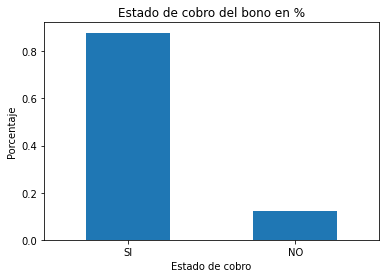

In [ ]:
bono.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ['SI', 'NO'])
plt.title("Estado de cobro del bono en %")
plt.xlabel("Estado de cobro")
plt.ylabel("Porcentaje")
plt.show()

In [ ]:
df["ENTIDAD_COBRO"].value_counts()

BANCO DE LA NACION    773291
Name: ENTIDAD_COBRO, dtype: int64

In [ ]:
df["MEDIO_COBRO"].value_counts()

BANCA CELULAR      513190
VENTANILLA         146652
ABONO EN CUENTA    113449
Name: MEDIO_COBRO, dtype: int64

In [ ]:
medio = df['MEDIO_COBRO'].value_counts()/df['MEDIO_COBRO'].shape[0]
print(medio)

BANCA CELULAR      0.663644
VENTANILLA         0.189647
ABONO EN CUENTA    0.146709
Name: MEDIO_COBRO, dtype: float64


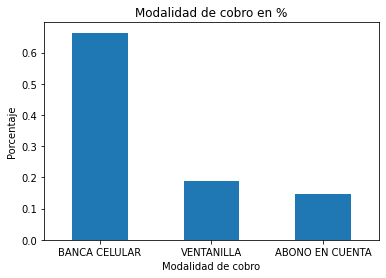

In [ ]:
medio.plot(kind = 'bar', rot=0)
plt.xticks(range(len(list(medio.index))), list(medio.index))
plt.title("Modalidad de cobro en %")
plt.xlabel("Modalidad de cobro")
plt.ylabel("Porcentaje")
plt.show()

In [ ]:
# Como se ve tanto las variables MONTO,TIPO_BONO,ENTIDAD_COBRO solo toman un valor por lo cual no aportan al modelo de clasificacion

In [ ]:
# Además el estado de cobro del bono el cual es la variable independiente en estudio tiene como clase mayoritaria SI

#**2.Preprocesamiento**

In [ ]:
df.head()

,COD_HOGAR,UBIGEO,DE_DEPARTAMENTO,DE_PROVINCIA,DE_DISTRITO,PERSONAS_HOGAR,MONTO,TIPO_BONO,BONO_COBRADO,FECHA_COBRO,ENTIDAD_COBRO,MEDIO_COBRO,FECHA_ACTUALIZACION
0,43,10205,AMAZONAS,BAGUA,IMAZA,2,760.0,BONO_INDEPENDIENTE,SI,2020-04-27T00:00:00Z,BANCO DE LA NACION,ABONO EN CUENTA,2020-06-20T00:00:00Z
1,76,10310,AMAZONAS,BONGARA,SHIPASBAMBA,1,760.0,BONO_INDEPENDIENTE,SI,2020-04-27T00:00:00Z,BANCO DE LA NACION,ABONO EN CUENTA,2020-06-20T00:00:00Z
2,166,60801,CAJAMARCA,JAEN,JAEN,1,760.0,BONO_INDEPENDIENTE,SI,2020-04-27T00:00:00Z,BANCO DE LA NACION,ABONO EN CUENTA,2020-06-20T00:00:00Z
3,174,10502,AMAZONAS,LUYA,CAMPORREDONDO,2,760.0,BONO_INDEPENDIENTE,SI,2020-04-29T00:00:00Z,BANCO DE LA NACION,BANCA CELULAR,2020-06-20T00:00:00Z
4,337,20301,ANCASH,ANTONIO RAYMONDI,LLAMELLIN,1,760.0,BONO_INDEPENDIENTE,NO,NaN,BANCO DE LA NACION,VENTANILLA,2020-06-20T00:00:00Z


In [ ]:
# Eliminamos variables que no aporten al modelo
df = df.drop(['COD_HOGAR','UBIGEO','MONTO','TIPO_BONO','FECHA_COBRO','ENTIDAD_COBRO','FECHA_ACTUALIZACION'],
             axis = 1)
df.head()

,DE_DEPARTAMENTO,DE_PROVINCIA,DE_DISTRITO,PERSONAS_HOGAR,BONO_COBRADO,MEDIO_COBRO
0,AMAZONAS,BAGUA,IMAZA,2,SI,ABONO EN CUENTA
1,AMAZONAS,BONGARA,SHIPASBAMBA,1,SI,ABONO EN CUENTA
2,CAJAMARCA,JAEN,JAEN,1,SI,ABONO EN CUENTA
3,AMAZONAS,LUYA,CAMPORREDONDO,2,SI,BANCA CELULAR
4,ANCASH,ANTONIO RAYMONDI,LLAMELLIN,1,NO,VENTANILLA


In [ ]:
df = df.reindex(columns=['DE_DEPARTAMENTO','DE_PROVINCIA','DE_DISTRITO','PERSONAS_HOGAR','MEDIO_COBRO','BONO_COBRADO'])
df.head()

,DE_DEPARTAMENTO,DE_PROVINCIA,DE_DISTRITO,PERSONAS_HOGAR,MEDIO_COBRO,BONO_COBRADO
0,AMAZONAS,BAGUA,IMAZA,2,ABONO EN CUENTA,SI
1,AMAZONAS,BONGARA,SHIPASBAMBA,1,ABONO EN CUENTA,SI
2,CAJAMARCA,JAEN,JAEN,1,ABONO EN CUENTA,SI
3,AMAZONAS,LUYA,CAMPORREDONDO,2,BANCA CELULAR,SI
4,ANCASH,ANTONIO RAYMONDI,LLAMELLIN,1,VENTANILLA,NO


##**2.1.Variables categóricas**

In [ ]:
# Hallamos el ratio de aparicion de cada departamento
departamento = (df["DE_DEPARTAMENTO"].value_counts()/df["DE_DEPARTAMENTO"].count()).to_dict()
departamento

{'AMAZONAS': 0.007287036833481833,
 'ANCASH': 0.03646492717489276,
 'APURIMAC': 0.0066818312899025074,
 'AREQUIPA': 0.10447554672173864,
 'AYACUCHO': 0.01924243266765034,
 'CAJAMARCA': 0.029652485286910103,
 'CALLAO': 0.02889339200895911,
 'CUSCO': 0.03145387700102549,
 'HUANCAVELICA': 0.004464037471016732,
 'HUANUCO': 0.02441254327284295,
 'ICA': 0.031430599864733975,
 'JUNIN': 0.05243174949663193,
 'LA LIBERTAD': 0.06386599611271825,
 'LAMBAYEQUE': 0.04276785841293899,
 'LIMA': 0.3113213525050725,
 'LORETO': 0.01664444562266986,
 'MADRE DE DIOS': 0.010005289082635127,
 'MOQUEGUA': 0.008453479996534292,
 'PASCO': 0.009950975764621598,
 'PIURA': 0.044658479149505166,
 'PUNO': 0.04414250262837664,
 'SAN MARTIN': 0.030768494654664285,
 'TACNA': 0.020672683375339944,
 'TUMBES': 0.007610330393086173,
 'UCAYALI': 0.012247653212050832}

In [ ]:
# Reemplazamos en el dataset
df["DE_DEPARTAMENTO"].replace(departamento, inplace=True)

In [ ]:
# Hallamos el ratio de aparicion de cada provincia
provincia = (df["DE_PROVINCIA"].value_counts()/df["DE_PROVINCIA"].count()).to_dict()
#provincia

In [ ]:
# Reemplazamos en el dataset
df["DE_PROVINCIA"].replace(provincia, inplace=True)

In [ ]:
#  Hallamos el ratio de aparicion de cada distrito
distrito = (df["DE_DISTRITO"].value_counts()/df["DE_DISTRITO"].count()).to_dict()
#distrito

In [ ]:
df["DE_DISTRITO"].replace(distrito, inplace=True)

In [ ]:
df.head()

,DE_DEPARTAMENTO,DE_PROVINCIA,DE_DISTRITO,PERSONAS_HOGAR,MEDIO_COBRO,BONO_COBRADO
0,0.007287,0.001741,0.000036,2,ABONO EN CUENTA,SI
1,0.007287,0.001194,0.000052,1,ABONO EN CUENTA,SI
2,0.029652,0.006352,0.005598,1,ABONO EN CUENTA,SI
3,0.007287,0.000581,0.000176,2,BANCA CELULAR,SI
4,0.036465,0.000079,0.000049,1,VENTANILLA,NO


In [ ]:
# Variables dummy
MEDIOCOBRO_dummy=pd.get_dummies(df["MEDIO_COBRO"])

In [ ]:
MEDIOCOBRO_dummy

,ABONO EN CUENTA,BANCA CELULAR,VENTANILLA
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,0,1
...,...,...,...
773286,0,1,0
773287,0,1,0
773288,0,1,0
773289,0,1,0


In [ ]:
#Unimos las variables tipo dummy al dataset original
df=pd.concat([df,MEDIOCOBRO_dummy],axis=1)

In [ ]:
# Eliminamos columnas METODODX Y SEXO
df.drop(['MEDIO_COBRO'], axis='columns', inplace=True)
df.head()

,DE_DEPARTAMENTO,DE_PROVINCIA,DE_DISTRITO,PERSONAS_HOGAR,BONO_COBRADO,ABONO EN CUENTA,BANCA CELULAR,VENTANILLA
0,0.007287,0.001741,0.000036,2,SI,1,0,0
1,0.007287,0.001194,0.000052,1,SI,1,0,0
2,0.029652,0.006352,0.005598,1,SI,1,0,0
3,0.007287,0.000581,0.000176,2,SI,0,1,0
4,0.036465,0.000079,0.000049,1,NO,0,0,1


In [ ]:
df.rename(columns ={'ABONO EN CUENTA':'ABONO_EN_CUENTA','BANCA CELULAR':'BANCA_CELULAR'},inplace = True)

In [ ]:
df.head()

,DE_DEPARTAMENTO,DE_PROVINCIA,DE_DISTRITO,PERSONAS_HOGAR,BONO_COBRADO,ABONO_EN_CUENTA,BANCA_CELULAR,VENTANILLA
0,0.007287,0.001741,0.000036,2,SI,1,0,0
1,0.007287,0.001194,0.000052,1,SI,1,0,0
2,0.029652,0.006352,0.005598,1,SI,1,0,0
3,0.007287,0.000581,0.000176,2,SI,0,1,0
4,0.036465,0.000079,0.000049,1,NO,0,0,1


In [ ]:
df = df.reindex(columns=['DE_DEPARTAMENTO','DE_PROVINCIA','DE_DISTRITO','PERSONAS_HOGAR','ABONO_EN_CUENTA',
                         'BANCA_CELULAR','VENTANILLA','BONO_COBRADO']
                )
df.head()

,DE_DEPARTAMENTO,DE_PROVINCIA,DE_DISTRITO,PERSONAS_HOGAR,ABONO_EN_CUENTA,BANCA_CELULAR,VENTANILLA,BONO_COBRADO
0,0.007287,0.001741,0.000036,2,1,0,0,SI
1,0.007287,0.001194,0.000052,1,1,0,0,SI
2,0.029652,0.006352,0.005598,1,1,0,0,SI
3,0.007287,0.000581,0.000176,2,0,1,0,SI
4,0.036465,0.000079,0.000049,1,0,0,1,NO


In [ ]:
df.to_csv("./bono_Independiente_trabajaperu_procesado.csv",
            index = False)

In [ ]:
!ls

BonoIndependiente-COVID19.ipynb
bono_Independiente_trabajaperu.csv
bono_Independiente_trabajaperu_procesado.csv
bono_Independiente_trabajaperu_procesado.xlsx
